## 3. Kernel Regression, Lake Mendota Clarity

### a)

$\lambda = 0.01$ and $\sigma = 10$ clearly overfits the data as the curve fit passes almost directly through each point. We can see that adjusting the regularization parameter to higher values causes the height of the peaks to decrease. Increasing sigma smoothes the curve out such that it has less peaks overall. I think sigma = 30 and lambda = 0.13 looks pretty good. 

### b)
You could use k-fold cross validation to systematically find a good value of sigma and lambda by splitting your data into test and validation sets. However, you wouldn't want to pick adjacent data to test/train your model, you would want to either stochastically pick training and validation sets or specify a certain number of days/month to be in the training/testing sets. If you held out June and July from your training data, you would miss the peak during those months. As such, you would have a bad fit. Once you have chosen a way to effictively split your training and validation sets, you would want to iterate over different combinations of lambda and sigma and compare the error rate of the validation sets over all your combinations of training/validation data. The lowest error rate will be your best choice for labda and sigma. 

Sigma =  10
Lambda =  0.01


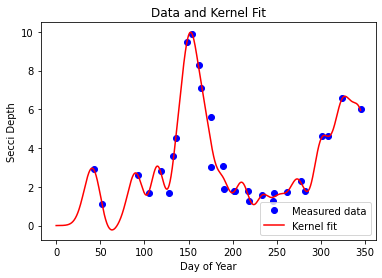

Sigma =  10
Lambda =  0.04


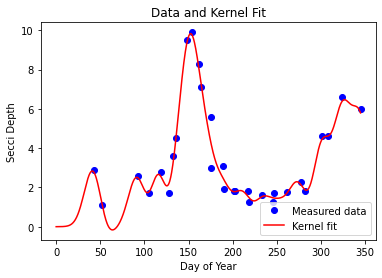

Sigma =  10
Lambda =  0.09


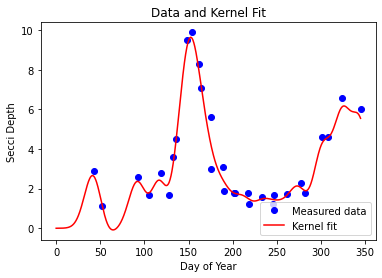

Sigma =  10
Lambda =  0.16


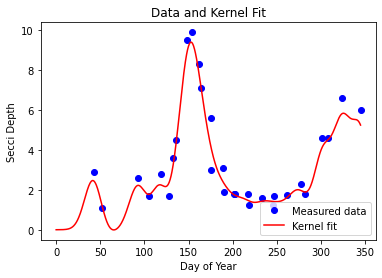

Sigma =  10
Lambda =  0.25


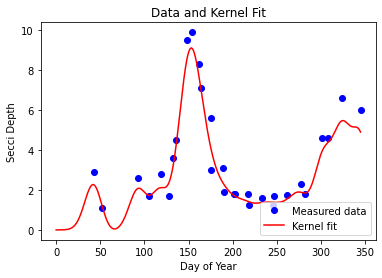

Sigma =  10
Lambda =  0.36


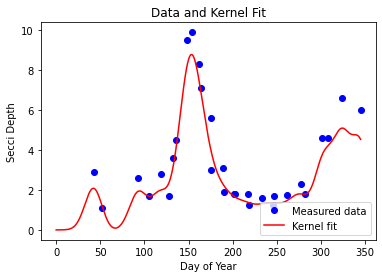

Sigma =  10
Lambda =  0.49


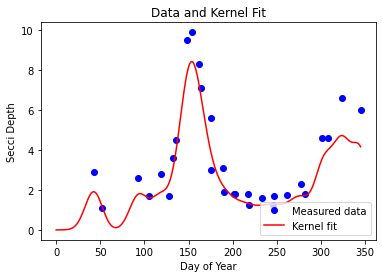

Sigma =  10
Lambda =  0.64


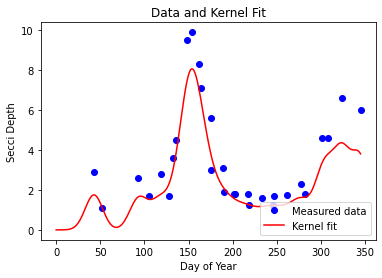

Sigma =  10
Lambda =  0.81


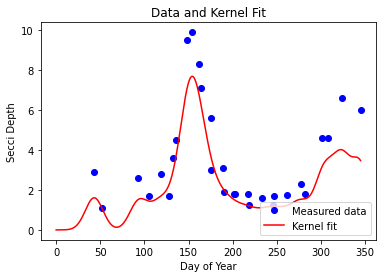

Sigma =  10
Lambda =  1.0


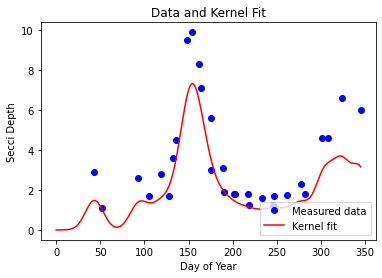

Sigma =  30
Lambda =  0.13


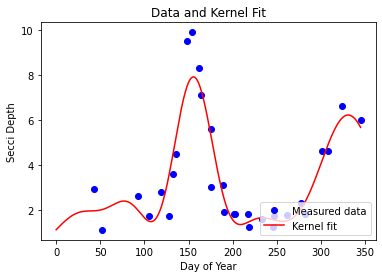

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def kernal_fit(lam, sigma):
    df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
    x = df['day_of_year']
    y = df['secchi_depth']
    n = x.size

    sigma = sigma #defines Gaussian kernel width
    p = 1000 #number of points on x-axis

    x_test = np.linspace(0,max(x),p)  # uniformly sample interval [0,1]

    # Kernel fitting to data

    lam = lam #ridge regression parameter

    distsq=np.zeros((n,n),dtype=float)

    for i in range(0,n):
        for j in range(0,n):
            distsq[i,j]=(x[i]-x[j])**2

    K = np.exp(-distsq/(2*sigma**2))

    alpha = np.linalg.inv(K+lam*np.identity(n))@y

    # Generate smooth curve corresponding to data fit

    distsq_xtest = np.zeros((p,n),dtype=float)
    for i in range(0,p):
        for j in range(0,n):
            distsq_xtest[i,j] = (x_test[i]-x[j])**2

    dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

    print('Sigma = ',sigma)
    print('Lambda = ',lam)
    plt.plot(x,y,'bo',label='Measured data')
    plt.plot(x_test,dtest,'r',label='Kernel fit')
    plt.title('Data and Kernel Fit')
    plt.legend(loc='lower right')
    plt.xlabel('Day of Year')
    plt.ylabel('Secci Depth')
    plt.show()

for i in range (10):
    kernal_fit(((i + 1)*(i+1)/100), 10)

kernal_fit(0.13, 30)
